# Programming for Data Science and Artificial Intelligence

## Supervised Learning - Classification - Logistic Regression - Binary

### Readings: 
- [GERON] Ch4
- [VANDER] Ch5
- [HASTIE] Ch4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Logistic Regression

Logistic regression is an supervised algorithm for solving classification problem where outcome (target) is discrete.   The idea behind is that $\boldsymbol{\theta}^T\mathbf{x}$ will return a continous value and thus may not be suitable for classification task.  However, if we can find one function $g$ such that

$$g(\boldsymbol{\theta}^T\mathbf{x}) = [0, 1]$$

then we can define our hypothesis function as $g$ and optimize accordingly based on some cost function.

It happens that $g$ (and also our hypothesis function $\mathbf{h}$) can be defined as the sigmoid (logit) function as the following:

$$ \mathbf{h} = g(\boldsymbol{\theta}^T\mathbf{x}) = \frac{1}{1+e^{-\boldsymbol{\theta}^T\mathbf{x}}} $$

**Trivials**: 
$e$ is a really convenient number for math, for example whenever you take the derivative of $e^x$, you get $e^x$ back again.  It's the only function on Earth that will do that.  Also, $e^x$ always give you positive numbers, thus it is no surprise this $e$ was often used in probability/statistics.  Last, it is convenient to apply $\log$ in any optimization problem including $e$ since it will cancel it nicely and will also not change the optimization answer since $\log$ is monotically increasing.  Btw, the common log base we use in natural log, but it really does not matter because the base is merely a constant.

Let's see how does it look in code:

Text(0,0.5,'y')

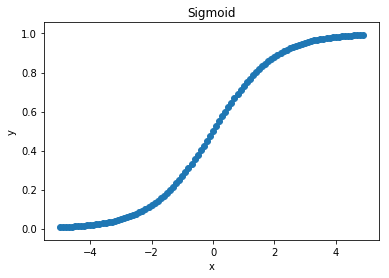

In [2]:
# lambda way 
sigmoid_gen = lambda x: (1+np.exp(-x))**-1

# Function way
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

# Generate data points
x = np.arange(-5,5,0.1)
y = sigmoid(x)

# Plot the sigmoid
plt.scatter(x, y)
plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('y')

Recall the derivative using quotient rule is        

$$ (\frac{f}{g})' = \frac{f'g - fg'}{g^2}$$

Given sigmoid function as

$$ g(x) = \frac{1}{1+e^{-x}} $$

Thus the derivative of sigmoid function is

$$
\begin{aligned}
    \frac{dg}{dx} &= \frac{0(1 + e^{-x}) - (-1)(e^{-x}))}{(1 + e^{-x})^2} \\
    &= \frac{e^{-x}}{(1 + e^{-x})^2}  = \frac{e^{-x} + 1 - 1}{(1 + e^{-x})^2} \\
    &= \frac{1}{(1 + e^{-x})} - \frac{1}{(1 + e^{-x})^2} \\
    &= \frac{1}{(1 + e^{-x})} \big(1 - \frac{1}{(1 + e^{-x})}\big)\\
    &= g(1 - g)
\end{aligned}
$$

Let's look at the gradient by modifying our sigmoid function a little bit.

Text(0,0.5,'y')

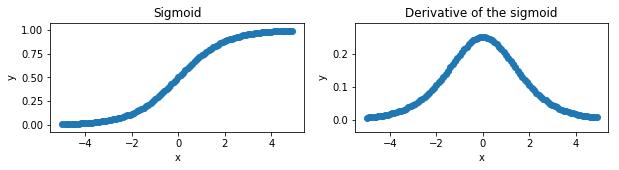

In [3]:
# Formula:
# g(x) = 1 / (1 + np.exp(-x))

# lambda way 
sigmoid_gen = lambda x: (1+np.exp(-x))**-1

# Function way
def sigmoid(x, deriv = False):
    sig = 1 / (1 + np.exp(-x))
    if deriv:
        sig_deriv = sig*(1-sig) 
        return sig_deriv
    else:
        return sig
# Generate data points
x = np.arange(-5,5,0.1)
y = sigmoid(x)
y_deriv = sigmoid(x, deriv = True)

# Plot the sigmoid
_, ax = plt.subplots(1, 2, figsize=(10, 2))
ax1 = ax[0]
ax1.scatter(x, y)
ax1.set_title('Sigmoid')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot the derivative of the sigmoid
ax2 = ax[1]
ax2.scatter(x, y_deriv)
ax2.set_title('Derivative of the sigmoid')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

**Trivials**: As you can see, the greatest gradient possible is 0.25.  Thus it means that in a gradient descent update, the update speed will be restricted by this value.

So if we had the following function

$$ \boldsymbol{\theta}^T\mathbf{x} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} $$

Given some point ($x_{1}$,$x_{2}$), if we plugged it to our sigmoid function, the equation could output a positive result (for one class), negative result (for the other class), or 0 (the point lies right on the decision boundary).

For example, given ($x_{1} = 3$, $x_{2} = 4$) and ($\theta_{1}$ = 1, $\theta_{2}$ = 2) (let's ignore $\theta_{0}$ for simplicity), the following code performs a sigmoid of $\boldsymbol{\theta}^T\mathbf{x}$

In [4]:
X = np.array([3, 4])
w = np.array([1, 2])
print("theta^Tx:", X @ w)
print("sigmoid of theta^Tx: ", sigmoid(X @ w))

theta^Tx: 11
sigmoid of theta^Tx:  0.999983298578152


### Where are we so far?

Well, we have so far motivated the followings:

1. We need a squashing function $g$ to use in classification problem
2. We will also go through together different possible squashing function including sigmoid, tanh, relu, and leaky relu

For now, we shall use only sigmoid function, since we will be talking mainly about logistic regression.  But we shall go back to these other activation functions later on in the course.

Here, we shall explore three different variants of logistic regression:
1. Binary Logistic Regression
2. Multinomial (multiclass) Logistic Regression
3. Logistic Regression with Newton-Raphson method

Last, we shall explore the sklearn way.

**Be warned**: There will be a lot of equations but they are necessary to understand in order to do the implementation.  For some obvious derivations, I will leave them as your exercise, but if you feel inimidated, ask me in class or come to my office.

## 1. Binary Logistic Regression

Logistic regression is a binary classification algorithm by simply finding a best fitted line that separates two dataset.  In order to squash the output to a value between 0 and 1, logistic regression used a function called logit function (or sigmoid function)

### Scratch

**Implementation steps:**
    
1. Prepare your data
    - add intercept
    - $\mathbf{X}$ and $\mathbf{y}$ and $\mathbf{w}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{y}$ -> $(m, )$
        - $\mathbf{w}$ -> $(n, )$
        - where $m$ is number of samples
        - where $n$ is number of features
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the *cross entropy* defined as
    $$J = - (\sum_{i=1}^m y^{(i)}\log(h) + (1-y^{(i)})\log(1-h))$$
    where h is defined as the sigmoid function as
    $$h = \frac{1}{1+e^{-\boldsymbol{\theta}^T\mathbf{x}}}$$
3. Calculate the gradient based on the loss
    - The gradient of $\theta_j$ is defined as
        $$\frac{\partial J}{\partial \theta_j} = \sum_{i=1}^{m}(h^{(i)}-y^{(i)})x_j$$
    - This can be derived by knowing that 
        $$J= - (y \log h + (1 - y) \log (1-h))$$
        $$h = \frac{1}{1+e^{-g}}$$
        $$g = \theta^Tx$$
    - Thus, gradient of $J$ in respect to some $\theta_j$ is
        $$\frac{\partial J}{\partial \theta_j} = \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}$$
      where
        $$\frac{\partial J}{\partial h} = \frac{h - y}{h(1-h)}$$
        $$\frac{\partial h}{\partial g} = h(1-h)$$
        $$\frac{\partial g}{\partial \theta_j} = x_j$$
    - Thus, 
    $$
    \begin{aligned}
    \frac{\partial J}{\partial \theta_j} &= \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}\\
   &= \frac{h - y}{h(1-h)} * h(1-h) * x_j\\
   &= (h - y)x_j\\
   \end{aligned}$$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tolerance

#### Step 1: Prepare your data

#### 1.1 Get your X and y in the right shape

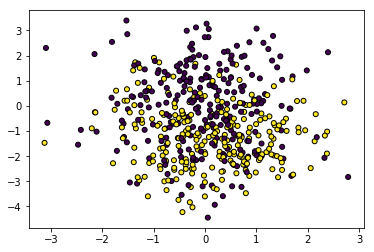

In [5]:
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# generate quite a lot of noise
# with only 4 informative features out of 10
# with 2 redundant features, overlapping with that 4 informative features
# and 4 noisy features
# Also, make std wider using n_clusters=2
X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

#### 1.2 Feature scale your data to reach faster convergence

In [6]:
# feature scaling helps reaching convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### 1.3 Train test split your data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 1.4 Add intercepts

In [8]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept

#### Step 2: Fit your algorithm 

#### 1. Define your algorithm

In [9]:
# here I use mini-batch as a demonstration
# you are free to use any variants of gradient descent
def mini_batch_GD(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    l_rate = 0.01
    #10% of data
    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0]) #<----with replacement
        batch_X = X[ix:ix+batch_size]
        batch_y = y[ix:ix+batch_size]
        cost, grad = gradient(batch_X, batch_y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        w = w - l_rate * grad
    return w, i

def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    # putting negative sign for negative log likelihood
    cost = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    grad = np.dot(X.T, error)
    return cost, grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
        
def h_theta(X, w):
    return sigmoid(X @ w)

def output(pred):
    return np.round(pred)

w, i = mini_batch_GD(X_train, y_train, max_iter=5000)

Cost at iteration 0 24.26015131959808
Cost at iteration 500 8.01830282673589
Cost at iteration 1000 9.192063884795994
Cost at iteration 1500 11.423506645003743
Cost at iteration 2000 8.631984574227786
Cost at iteration 2500 9.59484891239256
Cost at iteration 3000 13.72759554911885
Cost at iteration 3500 15.598099426966922
Cost at iteration 4000 8.388233784473426
Cost at iteration 4500 15.37831243516138


#### 2. Compute accuracy

In [10]:
yhat = output(h_theta(X_test, w))
yhat

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

### Classification metrics

Let us study some classification metrics that are quite different from the $r^2$ or $mse$ that we see from the regression.  Let me define a confusion matrix that looks like this:

<code>
		 	    Actual
			    +	   -
Predicted +     TP     FP
          -     FN     TN
</code>

TP is defined as true positives, FP as false positives, FN as false negatives, and TN as true negatives.

#### Accuracy, Recall, Precision, F1

Accuracy is straightforward

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

Accuracy is mostly avoided, unless your model is really balanced of both positives and negatives.  Instead, more useful classification metrics would be precision, recall, and f1-score

$$ Precision = TP / (TP + FP) $$

Precision is useful as metric when you want to prioritize removing false positive.  Example is search engine in which you do not want to return any search results that are "false positive"

$$ Recall = TP / (TP + FN) $$

Recall is useful as metric when you want to prioritize removing false negative.  Example is cancer detection in which you do not want to miss detecting any real positive (i.e., false negative).

$$ F1 = 2 x \frac{Precision * Recall}{Precision+Recall} $$

F1 is simply seeking a balance between Precision and Recall.  Also F1 is good metric when there is an uneven class distribution (large number of actual negatives)

To get accuracy, recall, precision and f1 score, we can use **sklearn.metrics.classification_report**.

In [11]:
from sklearn.metrics import classification_report
print("=========Classification report=======")
print(classification_report(y_test, yhat))

=========Classification report=======
             precision    recall  f1-score   support

          0       0.78      0.79      0.79        77
          1       0.78      0.77      0.77        73

avg / total       0.78      0.78      0.78       150



#### ROC

An ROC curve shows the performance of one classification model at **all classification thresholds**. For example, if we set threshold to 0.4, then anything less than 0.4 will be negative class, and otherwise positive class.  To build the ROC curve, you iterate all possible threshold, and collect the TP, FP, TN, TP of all possible threshold.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis, where

$$ TPR = TP / (TP + FN) $$

$$ FPR = FP / (FP + TN) $$

This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

To get area score under the curve, we can use **sklearn.metrics.roc_auc_score**

In [12]:
from sklearn.metrics import roc_auc_score
print("=========ROC AUC score=======")
print(roc_auc_score(y_test, yhat))

=========ROC AUC score=======
0.7796655399395125


#### Precision-Recall

Davis and Goadrich in this paper (https://ftp.cs.wisc.edu/machine-learning/shavlik-group/davis.icml06.pdf) propose that Precision-Recall (PR) metric will be more informative than ROC when dealing with highly skewed datasets. Because Precision is directly influenced by class imbalance so the Precision-recall are better to highlight differences between models for highly imbalanced data sets. When you compare different models with imbalanced settings, the area under the Precision-Recall curve will be more sensitive than the area under the ROC curve.

Example of drawback of ROC curve

- $TPR = TP / (TP + FN) $
- $FPR = FP / (FP + TN) $

======balanced data=====
- n_sample = 500
- pos = 250
- neg = 250
- Given the following confusion matrix

<code>
			Actual
			  +	     -
Predict.+     125     125
        -     0       250
</code>

- $TPR = 125 / (125 + 0) = 1$
- $FPR = 125 / 125 + 250 = 0.3$

Looks ok!

=====imbalanced data=======
- n_sample = 500
- pos = 30
- neg = 470
- Given the following confusion matrix

<code>
			Actual
			  +	     -
Predict.+     15     15
        -     0      470
</code>

- $TPR = 15 / (15 + 0)$ = 1
- $FPR = 15/ (15 + 470) {\approx} 0$

Perfect model??  How?  Because the amount of wrong positives is undermined by the great amount of negatives

====Precision-Recall curve works much better for imbalanced=====

- Precision =  TP / (TP + FP)
- Recall = TP / (TP + FN)

- Precision = 15 / (15 + 15) = 0.5. #minimize false positive
- Recall = 15 / (15 + 0) = 1.   #minimize false negative

Reflect much better!

For precision-recall metric, we can use **sklearn.metrics.average_precision_score** which compute the ratio between recall and precision (read more here -->https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py). 

**Note**: sklearn version of average_precision_score are typically used in binary classification to study the output of a classifier. In order to extend the precision-recall curve and average precision to multi-class or multi-label classification, it is necessary to **binarize** the output. I have demonstrated this at the multinomial logistic regression part

In [13]:
from sklearn.metrics import average_precision_score
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))

=========Average precision score=======
0.7099847792998478


### Sklearn

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

model = LogisticRegression()

model.fit(X_train, y_train)
yhat = model.predict(X_test)

print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))

print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.7119765166340509
=========Classification report=======
Report:               precision    recall  f1-score   support

          0       0.78      0.81      0.79        77
          1       0.79      0.75      0.77        73

avg / total       0.78      0.78      0.78       150



### === Task ===

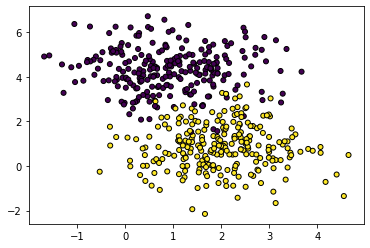

In [1]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

1. Put everything into a class called LogisticRegression. The training method should be "minibatch".

2. Perform a classification on the data given above.

3. Plot training losses as number of iters increases.

4. Write a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model.